<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT9_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from keras.datasets import mnist
(train_images, train_lables),(test_images, test_lables) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_lables.shape

(60000,)

In [7]:
print(train_lables[:5])

[5 0 4 1 9]


In [19]:
print(train_images[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

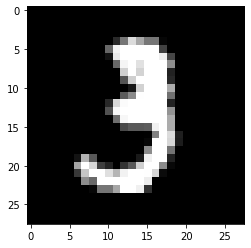

In [18]:
import matplotlib.pyplot as plt
hinh = train_images[10]
plt.imshow(hinh,cmap = 'gray')
plt.show()

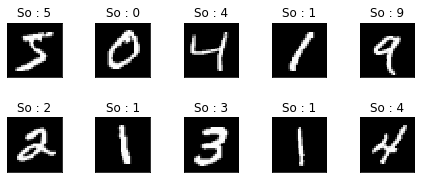

In [15]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap = 'gray', interpolation = 'none')
  plt.title('So : {}'.format(train_lables[i]))
  plt.xticks([])
  plt.yticks([])


In [2]:
from tensorflow.python import summary
#tao mo hinh 
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/32

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/32

In [4]:
from keras.utils import to_categorical
train_lables = to_categorical(train_lables, 10)
test_lables = to_categorical(test_lables, 10)

In [11]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_lables, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)
print(test_loss)

Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.2834 - accuracy: 0.9266
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0883 - accuracy: 0.9732
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0560 - accuracy: 0.9829
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0406 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1195 - accurac

In [19]:
from keras.models import load_model
model.save('model1.h5') # luu model
model11 = load_model('model1.h5') # doc model
#lable1 = model11.predict(time_image[10])
